In [1]:

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:

# Step 1: Download and load the dataset
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 2: Data Preprocessing
# Normalize the data to be between 0 and 1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [4]:
# Reshape the data to add a channel dimension
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [5]:
# Step 3: Build a simple autoencoder model
# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [6]:
# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [7]:
# Define the autoencoder model
autoencoder = models.Model(input_img, decoded)

In [8]:

# Step 4: Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
# Step 5: Train the model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - loss: 0.3090 - val_loss: 0.0985
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 127ms/step - loss: 0.0931 - val_loss: 0.0861
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 132ms/step - loss: 0.0841 - val_loss: 0.0821
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - loss: 0.0808 - val_loss: 0.0800
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - loss: 0.0792 - val_loss: 0.0789
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - loss: 0.0780 - val_loss: 0.0778
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 132ms/step - loss: 0.0761 - val_loss: 0.0764
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 134ms/step - loss: 0.0756 - val_loss: 0.0759
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 133ms/step - loss: 0.0750 - val_loss: 0.0755


In [10]:
# Step 6: Predict and visualize the reconstructed images
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


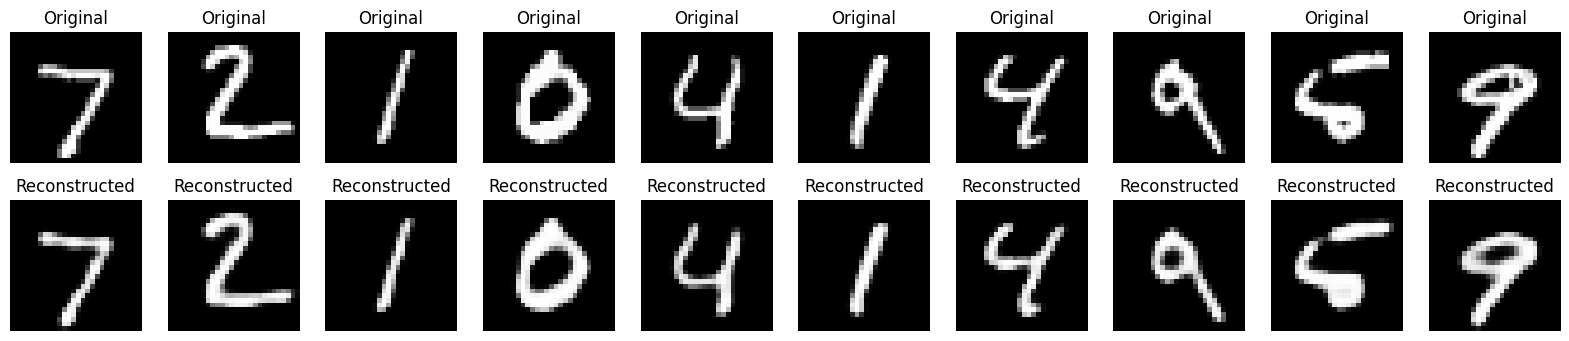

In [11]:
# Visualization: Display the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()